In [9]:
import cv2
import numpy as np
import glob
import random
import matplotlib.pyplot as plt

In [10]:
#Load Yolo
net = cv2.dnn.readNet('yolov3_canna_prev.weights','yolov3_testing.cfg')
classes = ['Canna']

In [11]:
img_path = r'D:\Personal Projects\Nebraska Projects\FlowerNetPheno\yolov3_custom_detection\test_can\8.png'
gt_path = r'D:\Personal Projects\Nebraska Projects\FlowerNetPheno\yolov3_custom_detection\test_can\8.txt'

In [15]:
layer_names = net.getLayerNames()
#output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
output_layers = net.getUnconnectedOutLayersNames()
colors = np.random.uniform(0, 255, size=(len(classes), 3))
img = cv2.imread(img_path)
height,width,channel=img.shape
print(height,width,channel)

420 420 3


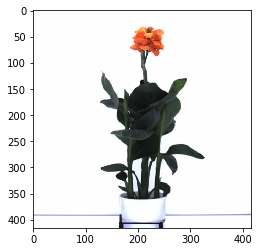

In [16]:
blob = cv2.dnn.blobFromImage(img,0.00392,(416,416),(0,0,0),True,crop=False)
im2display = blob[0].transpose((1,2,0))
plt.imshow(im2display,interpolation='nearest')

In [17]:
net.setInput(blob)
outs = net.forward(output_layers)

In [18]:
class_ids = []
confidences = []
boxes = []
for out in outs:
        for detection in out:
            scores = detection[5:]
            #print (scores)
            class_id = np.argmax(scores)
            #print (class_id)
            confidence = scores[class_id]
            #print (confidence)
            if confidence > 0.3:
                # Object detected
                print(class_id, confidence)
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
boxes

0 0.9999685


[[185, 32, 66, 58]]

In [19]:

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        
        x, y, w, h = boxes[i]
        label = str(round(confidences[i],5))
        color = (0,0, 255) #colors[class_ids[i]]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y-10), font, 1, color,2) #y+30, font,3
        
def main():    
    screen_res = 420, 420
    scale_width = screen_res[0] / width
    scale_height = screen_res[1] / height
    scale = min(scale_width, scale_height)
    #resized window width and height
    window_width = int(img.shape[1] * scale)
    window_height = int(img.shape[0] * scale)
    #cv2.WINDOW_NORMAL makes the output window resizealbe
    cv2.namedWindow('Resized Window', cv2.WINDOW_NORMAL)
    #resize the window according to the screen resolution
    cv2.resizeWindow('Resized Window', window_width, window_height)
    cv2.imshow('Resized Window', img)
    cv2.waitKey(5000)
    cv2.destroyAllWindows()
main()

[0]


In [22]:
def IoU(box1,box2):
    x1,y1,w1,h1=box1
    x2,y2,w2,h2=box2
    w_intersection = min(x1+w1,x2+w2)-max(x1,x2)
    h_intersection = min(y1+h1,y2+h2)-max(y1,y2)
    
    if w_intersection <= 0 or h_intersection <= 0:
        return 0
    I = w_intersection*h_intersection
    U = w1*h1+w2*h2 - I
    return I/U

In [ ]:
iou = IoU()